In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\Nikita\Downloads\Wholesale customers data (1).csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.shape

(440, 8)

In [6]:
data["Channel"].value_counts() 

1    298
2    142
Name: Channel, dtype: int64

In [8]:
data["Region"].value_counts() 

3    316
1     77
2     47
Name: Region, dtype: int64

In [9]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head() 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


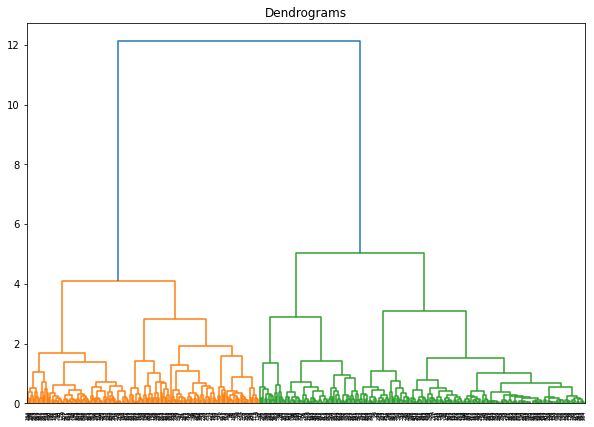

In [12]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

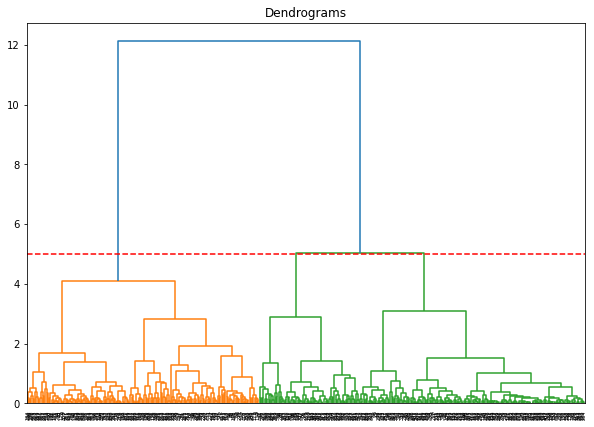

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

In [20]:
cl=cluster.fit_predict(data_scaled)

In [21]:
cl

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [22]:
data["Cluster"]=cl

In [23]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


In [17]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


In [36]:
data[data["Cluster"]==1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
5,2,3,9413,8259,5126,666,1795,1451,1
7,2,3,7579,4956,9426,1669,3321,2566,1
...,...,...,...,...,...,...,...,...,...
428,1,3,3047,5970,4910,2198,850,317,1
430,1,3,3097,4230,16483,575,241,2080,1
433,1,3,1982,3218,1493,1541,356,1449,1
437,2,3,14531,15488,30243,437,14841,1867,1


In [24]:
data.groupby(["Cluster"]).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.128405,2.529183,17050.108949,3019.957198,4053.400778,4069.980545,861.171206,1321.077821
1,1.595628,2.562842,4908.486339,9695.234973,13425.344262,1670.300546,5718.775956,1811.071038


In [25]:
clus4=data.groupby(["Cluster"]).agg({"Fresh":["mean"],
                                "Milk":["mean"],
                                "Grocery":["mean"],
                                "Frozen":["mean"],
                                "Detergents_Paper":["mean"],
                                "Delicassen":["mean"]
                                    })
new_col=[]
for i in range(len(list(clus4.columns))):
    new_col.append("_".join(list(clus4.columns[i])))
    
#     print("_".join(list(clus4.columns[i])))
clus4.columns=new_col
cluster4=clus4.T
cluster4.columns=["Clust0", "Clust1"]

In [69]:
# new_colum=[]
# for i in range(len(list(clus4.columns))):
#     print("_".join(list(clus4.columns[i])))
#     new_colum.append("_".join(list(clus4.columns[i])))

In [26]:
cluster4

,Clust0,Clust1
Fresh_mean,17050.108949,4908.486339
Milk_mean,3019.957198,9695.234973
Grocery_mean,4053.400778,13425.344262
Frozen_mean,4069.980545,1670.300546
Detergents_Paper_mean,861.171206,5718.775956
Delicassen_mean,1321.077821,1811.071038


In [71]:
clus4.T

Cluster,0,1
Fresh_mean,17050.108949,4908.486339
Milk_mean,3019.957198,9695.234973
Grocery_mean,4053.400778,13425.344262
Frozen_mean,4069.980545,1670.300546
Detergents_Paper_mean,861.171206,5718.775956
Delicassen_mean,1321.077821,1811.071038


In [30]:
cluster4_1=cluster4.reset_index()
cluster4_1.drop(columns=["index"], inplace=True)
cluster4_1

,Clust0,Clust1
0,17050.108949,4908.486339
1,3019.957198,9695.234973
2,4053.400778,13425.344262
3,4069.980545,1670.300546
4,861.171206,5718.775956
5,1321.077821,1811.071038


In [31]:
d_1=data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]].describe().T["mean"].reset_index()

In [32]:
d_1

,index,mean
0,Fresh,12000.297727
1,Milk,5796.265909
2,Grocery,7951.277273
3,Frozen,3071.931818
4,Detergents_Paper,2881.493182
5,Delicassen,1524.870455


In [33]:
clust=pd.concat([d_1, cluster4_1], axis=1)

In [34]:
data["Cluster"].value_counts()

0    257
1    183
Name: Cluster, dtype: int64

In [ ]:
clu

In [35]:
clust.to_excel("cluster_Hie.xlsx")

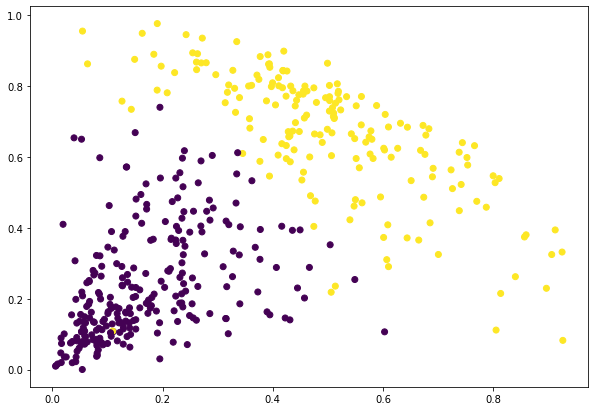

In [84]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

In [85]:
de=pd.DataFrame({"Fresh":[560],"Milk" :[230],"Grocery":[450],"Frozen":[560],
              "Detergents_Paper" :[100],"Delicassen":[0]})

In [90]:
cluster.fit_predict(de)  

ValueError: Found array with 1 sample(s) (shape=(1, 6)) while a minimum of 2 is required by AgglomerativeClustering.

In [19]:
df=pd.read_csv(r"D:\Training\Imarticus\PGA\PGA14\week12\HierarchicalClustering\Hierarchical Clustering\Dataset\google_review_ratings.csv")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [20]:
df.drop(columns=["User"], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5454 non-null   float64
 1   Category 2   5454 non-null   float64
 2   Category 3   5454 non-null   float64
 3   Category 4   5454 non-null   float64
 4   Category 5   5454 non-null   float64
 5   Category 6   5454 non-null   float64
 6   Category 7   5454 non-null   float64
 7   Category 8   5454 non-null   float64
 8   Category 9   5454 non-null   float64
 9   Category 10  5454 non-null   float64
 10  Category 12  5454 non-null   float64
 11  Category 13  5454 non-null   float64
 12  Category 14  5454 non-null   float64
 13  Category 15  5454 non-null   float64
 14  Category 16  5454 non-null   float64
 15  Category 17  5454 non-null   float64
 16  Category 18  5454 non-null   float64
 17  Category 19  5454 non-null   float64
 18  Category 20  5454 non-null   float64
 19  Catego

In [22]:
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5450,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5451,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5452,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


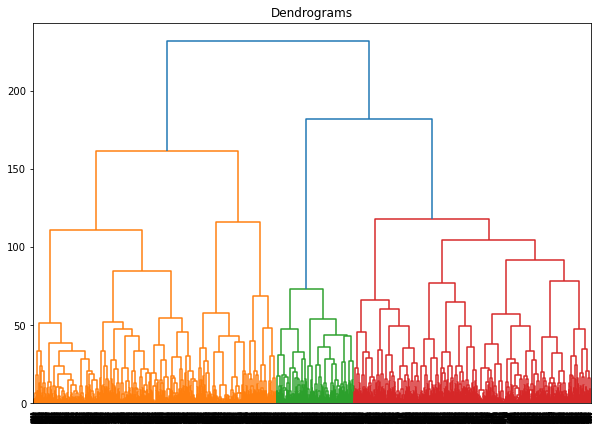

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

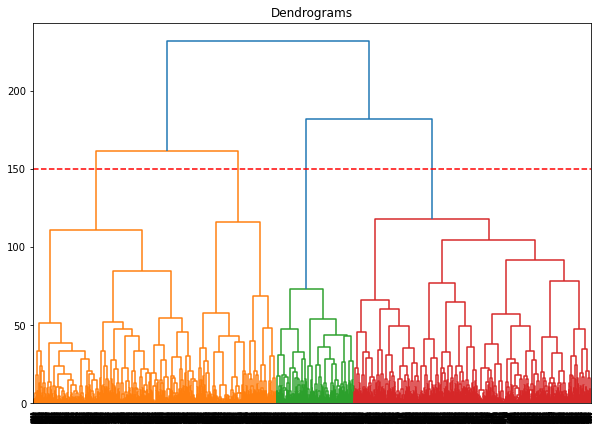

In [58]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')

In [59]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

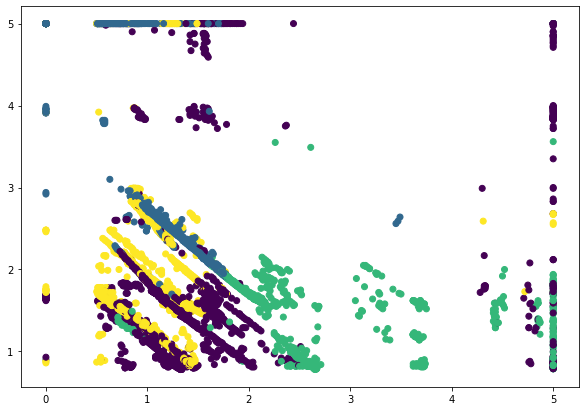

In [63]:
plt.figure(figsize=(10, 7)) 
plt.scatter(df['Category 24'], df['Category 12'], c=cluster.labels_) 